Modelling Transmission Response of ITO (Old Models, defunct)

## 1. Introduction
This file contains the different models being used to attempt to successfully model a correct Transmission Response of Indium Tin Oxide upon a Pump-Probe laser setup. To look at the known relationships and the background relations, consult the Relations notebook. 

Code is stored in separate python files and then loaded in. This is to tidy up the code as well as to reduce file size on this notebook. Note that laser parameters are not transferred between this and the relations file, so be careful on that.

## 2. Module Import and Setup
<a id='top'></a>

In [1]:
from IDRIM.constants import *
from IDRIM.relations import *
from IDRIM.graph import *
from IDRIM.commons import *
from IDRIM.checks import *
from IDRIM.modcom import *
from IDRIM.genesis import *

from numpy import inf

In [2]:
Parameters={'wavelength':1240*nm, 'pulse':104e-15, 'angle':30, 'thick':[inf, 310, 1100000, inf], 'Res':100}

In [42]:
i = IntensityArrayIndex(I=400, IntRes=Parameters['Res']) #Change I=??? to whatever intensity value you want.
#Obviously make sure it is an allowed intensity value given the resolution.

In [4]:
mu_array, Cp_array, Ce_array, wp_array, RI_array, Fit = Regeneration(Parameters, OVERRIDE=0)
Relations_dict = {'mu':mu_array, 'Cp':Cp_array, 'wp':wp_array, 'Ce':Ce_array, 'RI':RI_array}

No change in parameters detected.
Not solving for Chemical Potential. Loading from previously saved data.
Mu Loaded.
Not solving Phonon Heat Capacity. Loading from saved file.
Phonon Heat Capacity loaded.
Not solving Electron Heat Capacity. Loading from saved file.
Electron Heat Capacity loaded.
Loading Plasma Frequency from saved file.
Loaded Plasma Frequency.
Loading Refractive Index from saved file.
Loaded Refractive Index


REGENERATION COMPLETE.


## 3. Controls
<a id='Controls'></a>
Inputs:

0 : Model will not be ran

1 : Model will run, but only display Time v. Temperature and Optical Coefficients v. Time.

If you desire more graphs, those Graphing functions are avaliable to use.

In [5]:
#Model X-1: Boyd's Two Temperature Model
bEnableBoyd = 1 # 
#Model X-2: Tom's Modification to Boyd's Model
bEnableTom = 1 #
#Model X-3: Simple Two Temperature Model
bEnableSimple = 0
#Model X-4: Simple TTM with Phonon Decay
bEnableSimpleTom = 0
#Model X-5: Linear Tp Non-Constant Phonon Decay
bEnableX5 = 0
#Model X-6: Linear Te Non-Constant Phonon Decay
bEnableX6 = 0
#Model X-7: Inverse Tp Phonon Decay
bEnableX7 = 0
#Model X-8: Non-Thermal Energy Density based Phonon Decay
bEnableX8 = 0
#Model X-9: Non-Thermal Energy Density with Reciprocal Tp Phonon Decay
bEnableX9 = 1
#Model O-1: https://aip.scitation.org/doi/full/10.1063/5.0051707 Model
bEnableOtherPaper = 0

## 4. Index of Models
<a id='index'></a>
[Go to X-1](#x1)

[Go to X-2](#x2)

[Go to X-3](#x3)

[Go to X-4](#x4)

[Go to X-5](#x5)

[Go to X-6](#x6)

[Go to X-7](#x7)

[Go to X-8](#x8)

[Go to X-9](#x9)

[Go to O-1](#o1)


[Go to Comparisons](#compare)

<a id='x1'></a>
## Model X-1: Boyd's Two Temperature Model

$$\frac{dT_e}{dt} C_e = g_{ep}(T_p-T_e)+\frac{N}{2\tau_e}$$

$$\frac{dT_p}{dt} C_p = g_{ep}(T_e-T_p) + \frac{N}{2\tau_p}$$

$$\frac{dN}{dt} = P-\frac{N}{2\tau_e}-\frac{N}{2\tau_p}$$

In [6]:
if bEnableBoyd == 1:
    import IDRIM.models.x1 as x1
    X1 = x1.Run(Relations_dict, Parameters, Fit)

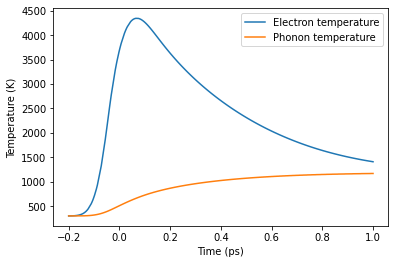

In [7]:
if bEnableBoyd == 1:
    Graphing_TimeVSTemperature(X1['Te'][i], X1['Tp'][i])

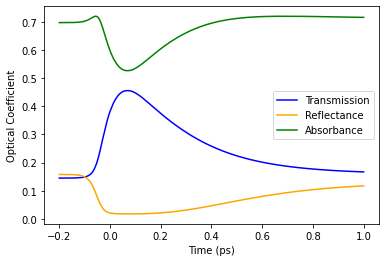

In [8]:
if bEnableBoyd == 1:
    Graphing_TimeVSCoefficients(X1['Te'][i], X1['T'][i], X1['R'][i], X1['A'][i])

[Return to Index of Models](#index)
<a id='x2'></a>
## Model X-2: Tom's Modification to Boyd's Model

$$\frac{dT_e}{dt} C_e = g_{ep}(T_p-T_e)+\frac{N}{2\tau_e}$$

$$\frac{dT_p}{dt} C_p = g_{ep}(T_e-T_p) +\frac{N}{2\tau_p} - \Xi(T_p-T_0)$$

$$\frac{dN}{dt} = P - \frac{N}{2\tau_e} - \frac{N}{2\tau_p}$$

In [9]:
if bEnableTom == 1:
    import IDRIM.models.x2 as x2
    X2 = x2.Run(Relations_dict, Parameters, Fit, CON=5e17)

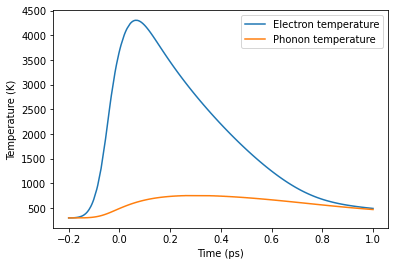

In [10]:
if bEnableTom == 1:
    Graphing_TimeVSTemperature(X2['Te'][i], X2['Tp'][i])

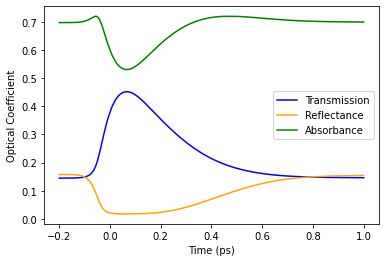

In [11]:
if bEnableTom == 1:
    Graphing_TimeVSCoefficients(X2['Te'][i], X2['T'][i], X2['R'][i], X2['A'][i])

[Return to Index](#index)
<a id='x3'></a>
## Model X-3: Simple Two Temperature Model
$$\frac{dT_e}{dt}C_e = g_{ep}(T_p - T_e) + P$$

$$\frac{dT_p}{dt}C_p = g_{ep}(T_e-T_p) $$

In [12]:
if bEnableSimple == 1:
    import IDRIM.models.x3 as x3
    X3 = x3.Run(Relations_dict, Parameters, Fit, CON=1)

In [13]:
if bEnableSimple == 1:
    Graphing_TimeVSTemperature(X3['Te'][i], X3['Tp'][i])

In [14]:
if bEnableSimple == 1:
    Graphing_TimeVSCoefficients(X3['Te'][i], X3['T'][i], X3['R'][i], X3['A'][i])

[Return to Index](#index)
<a id='x4'></a>
## Model X-4: Simple TTM with phonon decay
$$\frac{dT_e}{dt}C_e = g_{ep}(T_p - T_e) + P$$

$$\frac{dT_p}{dt}C_p = g_{ep}(T_e-T_p) - \Xi(T_p - T_0)$$

In [15]:
if bEnableSimpleTom == 1:
    import IDRIM.models.x4 as x4
    X4 = x4.Run(Relations_dict, Parameters, Fit, 1e18)

In [16]:
if bEnableSimpleTom == 1:
    Graphing_TimeVSTemperature(X4['Te'][i], X4['Tp'][i])

In [17]:
if bEnableSimpleTom == 1:
    Graphing_TimeVSCoefficients(X4['Te'][i], X4['T'][i], X4['R'][i], X4['A'][i])

[Return to Index](#index)
<a id='x5'></a>
## Model X-5: Phonon Decay with Tp Term
$$\frac{dT_e}{dt} C_e = g_{ep}(T_p-T_e)+\frac{N}{2\tau_e}$$

$$\frac{dT_p}{dt} C_p = g_{ep}(T_e-T_p) +\frac{N}{2\tau_p} - \Xi T_p(T_p-T_0)$$

$$\frac{dN}{dt} = P - \frac{N}{2\tau_e} - \frac{N}{2\tau_p}$$

In [18]:
if bEnableX5 == 1:
    import IDRIM.models.x5 as x5
    X5 = x5.Run(Relations_dict, Parameters, Fit, CON=1e17)

In [19]:
if bEnableX5 == 1:
    Graphing_TimeVSTemperature(X5['Te'][i], X5['Tp'][i])

In [20]:
if bEnableX5 == 1:
    Graphing_TimeVSCoefficients(X5['Te'][i], X5['T'][i], X5['R'][i], X5['A'][i])

[Return to Index](#index)
<a id='x6'></a>
## Model X-6: Electron Temperature Dependent Phonon Decay
$$\frac{dT_e}{dt} C_e = g_{ep}(T_p-T_e)+\frac{N}{2\tau_e}$$

$$\frac{dT_p}{dt} C_p = g_{ep}(T_e-T_p) +\frac{N}{2\tau_p} - \Xi T_e(T_p-T_0)$$

$$\frac{dN}{dt} = P - \frac{N}{2\tau_e} - \frac{N}{2\tau_p}$$


In [21]:
if bEnableX6 == 1:
    import IDRIM.models.x6 as x6
    X6 = x6.Run(Relations_dict, Parameters, Fit, CON=1e16)

In [22]:
if bEnableX6 == 1:
    Graphing_TimeVSTemperature(X6['Te'][i], X6['Tp'][i])

In [23]:
if bEnableX6 == 1:
    Graphing_TimeVSCoefficients(X6['Te'][i], X6['T'][i], X6['R'][i], X6['A'][i])

[Return to Index](#index)
<a id='x7'></a>
## Model X-7: Inverse Phonon Temperature Dependent Phonon Decay
$$\frac{dT_e}{dt} C_e = g_{ep}(T_p-T_e)+\frac{N}{2\tau_e}$$

$$\frac{dT_p}{dt} C_p = g_{ep}(T_e-T_p) +\frac{N}{2\tau_p} - \Xi \frac{1}{T_p} (T_p-T_0)$$

$$\frac{dN}{dt} = P - \frac{N}{2\tau_e} - \frac{N}{2\tau_p}$$

In [24]:
if bEnableX7 == 1:
    import IDRIM.models.x7 as x7
    X7 = x7.Run(Relations_dict, Parameters, Fit, CON=1e18)

In [25]:
if bEnableX7 == 1:
    Graphing_TimeVSTemperature(X7['Te'][i], X7['Tp'][i])

In [26]:
if bEnableX7 == 1:
    Graphing_TimeVSCoefficients(X7['Te'][i], X7['T'][i], X7['R'][i], X7['A'][i])

[Return to Index](#index)
<a id='x8'></a>
## Model X-8: Non-Thermal Energy Density Dependent Phonon Decay
$$\frac{dT_e}{dt} C_e = g_{ep}(T_p-T_e)+\frac{N}{2\tau_e}$$

$$\frac{dT_p}{dt} C_p = g_{ep}(T_e-T_p) +\frac{N}{2\tau_p} - \Xi N (T_p-T_0)$$

$$\frac{dN}{dt} = P - \frac{N}{2\tau_e} - \frac{N}{2\tau_p}$$


In [27]:
if bEnableX8 == 1:
    import IDRIM.models.x8 as x8
    X8 = x8.Run(Relations_dict, Parameters, Fit, CON=8e12)

In [28]:
if bEnableX8 == 1:
    Graphing_TimeVSTemperature(X8['Te'][i], X8['Tp'][i])

In [29]:
if bEnableX8 == 1:
    Graphing_TimeVSCoefficients(X8['Te'][i], X8['T'][i], X8['R'][i], X8['A'][i])

[Return to Index](#index)
<a id='x9'></a>
## Model X-9: Non-Thermal Energy Density With Reciprocal Phonon Temperature

$$\frac{dT_e}{dt} C_e = g_{ep}(T_p-T_e)+\frac{N}{2\tau_e}$$

$$\frac{dT_p}{dt} C_p = g_{ep}(T_e-T_p) +\frac{N}{2\tau_p} - \Xi \frac{N}{T_p} (T_p-T_0)$$

$$\frac{dN}{dt} = P - \frac{N}{2\tau_e} - \frac{N}{2\tau_p}$$

In [30]:
if bEnableX9 == 1:
    import IDRIM.models.x9 as x9
    X9 = x9.Run(Relations_dict, Parameters, Fit, CON=1e15)

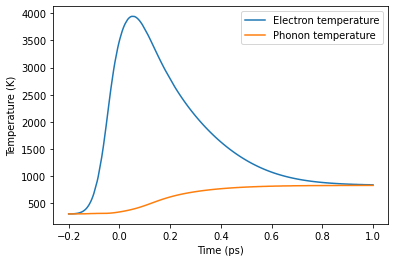

In [31]:
if bEnableX9 == 1:
    Graphing_TimeVSTemperature(X9['Te'][i], X9['Tp'][i])

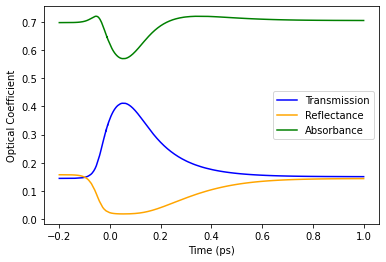

In [32]:
if bEnableX9 == 1:
    Graphing_TimeVSCoefficients(X9['Te'][i], X9['T'][i], X9['R'][i], X9['A'][i])

[Return to Index](#index)
<a id='o1'></a>
## Model O-1: Other Paper Model https://aip.scitation.org/doi/full/10.1063/5.0051707

In [33]:
if bEnableOtherPaper == 1:
    import IDRIM.models.o1 as o1
    O1 = o1.Run(Relations_dict, Parameters)

In [34]:
if bEnableOtherPaper == 1:
    Graphing_TimeVSTemperature(O1['Te'][i], O1['Tp'][i])

In [35]:
if bEnableOtherPaper == 1:
    Graphing_TimeVSCoefficients(O1['Te'][i], O1['T'][i], O1['R'][i], O1['A'][i])

[Return to Index](#index)
<a id='compare'></a>
## Model Comparisons

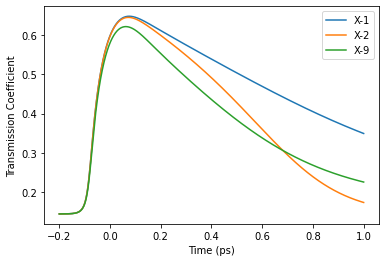

In [43]:
if bEnableBoyd == 1:
    plt.plot(time_array/1e-12, X1['T'][i], label="X-1")
if bEnableTom == 1:
    plt.plot(time_array/1e-12, X2['T'][i], label="X-2")
if bEnableSimple == 1:
    plt.plot(time_array/1e-12, X3['T'][i], label="X-3")
if bEnableSimpleTom == 1:
    plt.plot(time_array/1e-12, X4['T'][i], label="X-4")
if bEnableX5 == 1:
    plt.plot(time_array/1e-12, X5['T'][i], label="X-5")
if bEnableX6 == 1:
    plt.plot(time_array/1e-12, X6['T'][i], label="X-6")
if bEnableX7 == 1:
    plt.plot(time_array/1e-12, X7['T'][i], label="X-7")
if bEnableX8 == 1:
    plt.plot(time_array/1e-12, X8['T'][i], label="X-8")
if bEnableX9 == 1:
    plt.plot(time_array/1e-12, X9['T'][i], label="X-9")
if bEnableOtherPaper == 1:
    plt.plot(time_array/1e-12, O1['T'][i], label="O-1")
    
#Transmission_Time = Interpolate(X8['Te'][i], X8['Te'][i], X8['T'][i])
#plt.plot(time_array/1e-12, Transmission_Time, label="Test", linestyle="dashed")
    
plt.xlabel("Time (ps)")
plt.ylabel("Transmission Coefficient")
plt.legend()